In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.decomposition import PCA
from src.utils import find_ckpt_file, convert_to_tensor
import random
from src.envs.cntrees import CnTreeEnv
import networkx as nx
import matplotlib.pyplot as plt

# A few example Tree Mazes

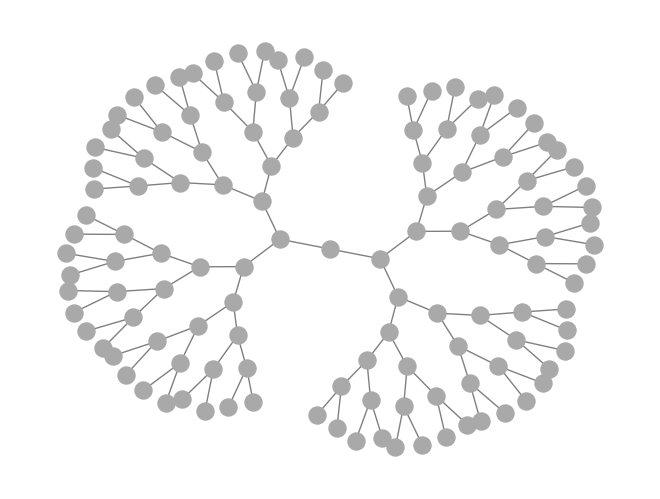

In [6]:
env = CnTreeEnv(
    max_layers=7,
    branching_prob=1.0,
    horizon=1,
    node_encoding_corr=0.,
    state_dim=10
)

G = env.to_networkx()
pos = nx.kamada_kawai_layout(G)
plt.figure()
nx.draw(G, pos,
       node_color='darkgray',
       node_size=150,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=1,
       alpha=1.)
plt.savefig('figs/7_left.pdf', dpi=300, transparent=True)
plt.show()


In [3]:
goal_node = (
    env.node_map[tuple(env.goal.tolist())].layer,
    env.node_map[tuple(env.goal.tolist())].pos)

In [4]:
env.optimal_action_map, _ = env.make_opt_action_dict()
opt_action_map = {}
for encoding in env.optimal_action_map.keys():
    node = (env.node_map[encoding].layer, env.node_map[encoding].pos)
    opt_action_map[node] = env.optimal_action_map[encoding]

In [5]:
opt_action_map

{(6, 63): 3,
 (5, 31): 2,
 (4, 15): 2,
 (6, 62): 0,
 (3, 7): 2,
 (5, 30): 0,
 (2, 3): 2,
 (4, 14): 0,
 (6, 60): 0,
 (6, 61): 0,
 (1, 1): 2,
 (3, 6): 0,
 (5, 28): 0,
 (5, 29): 0,
 (0, 0): 2,
 (2, 2): 0,
 (4, 12): 0,
 (4, 13): 0,
 (6, 56): 0,
 (6, 57): 0,
 (6, 58): 0,
 (6, 59): 0,
 (1, 0): 0,
 (3, 4): 0,
 (3, 5): 0,
 (5, 24): 0,
 (5, 25): 0,
 (5, 26): 0,
 (5, 27): 0,
 (2, 0): 0,
 (2, 1): 0,
 (4, 8): 0,
 (4, 9): 0,
 (4, 10): 0,
 (4, 11): 0,
 (6, 48): 0,
 (6, 49): 0,
 (6, 50): 0,
 (6, 51): 0,
 (6, 52): 0,
 (6, 53): 0,
 (6, 54): 0,
 (6, 55): 0,
 (3, 0): 0,
 (3, 1): 0,
 (3, 2): 0,
 (3, 3): 0,
 (5, 16): 0,
 (5, 17): 0,
 (5, 18): 0,
 (5, 19): 0,
 (5, 20): 0,
 (5, 21): 0,
 (5, 22): 0,
 (5, 23): 0,
 (4, 0): 0,
 (4, 1): 0,
 (4, 2): 0,
 (4, 3): 0,
 (4, 4): 0,
 (4, 5): 0,
 (4, 6): 0,
 (4, 7): 0,
 (6, 32): 0,
 (6, 33): 0,
 (6, 34): 0,
 (6, 35): 0,
 (6, 36): 0,
 (6, 37): 0,
 (6, 38): 0,
 (6, 39): 0,
 (6, 40): 0,
 (6, 41): 0,
 (6, 42): 0,
 (6, 43): 0,
 (6, 44): 0,
 (6, 45): 0,
 (6, 46): 0,
 (6, 47): 0

In [ ]:
# Colored by optimal action
env = CnTreeEnv(
    max_layers=7,
    branching_prob=1.0,
    horizon=1,
    node_encoding_corr=0.,
    state_dim=10
)

G = env.to_networkx()
pos = nx.kamada_kawai_layout(G)
plt.figure()
nx.draw(G, pos,
       node_color='darkgray',
       node_size=150,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=1,
       alpha=1.)
plt.show()


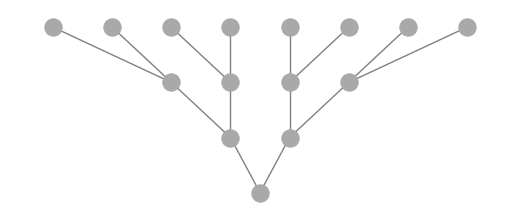

In [4]:
env = CnTreeEnv(
    max_layers=4,
    branching_prob=1.0,
    horizon=1,
    node_encoding_corr=0.,
    state_dim=10
)

G = env.to_networkx()
pos = nx.bfs_layout(G, start=(0, 0), align='horizontal')
plt.figure(figsize=(5, 2))
nx.draw(G, pos,
       node_color='darkgray',
       node_size=150,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=1,
       alpha=1.)
plt.savefig('maze_4_layers.png', dpi=300, transparent=True)
plt.show()


<Figure size 640x480 with 0 Axes>

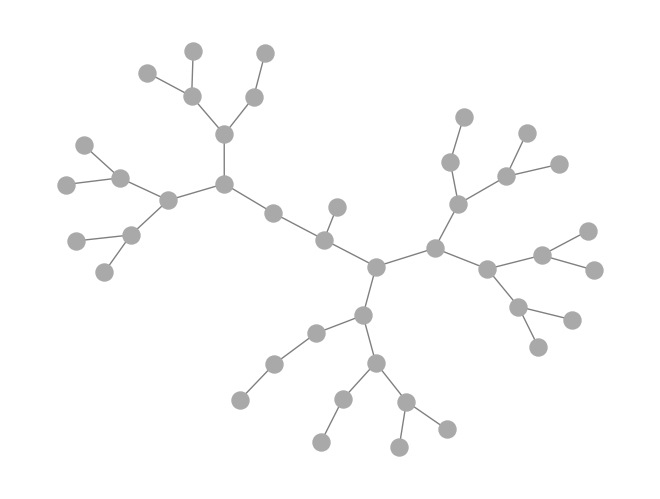

In [9]:
env = CnTreeEnv(
    max_layers=7,
    branching_prob=0.9,
    horizon=1,
    node_encoding_corr=0.,
    state_dim=10
)

G = env.to_networkx()
pos = nx.kamada_kawai_layout(G)
plt.clf()
plt.figure()
nx.draw(G, pos,
       node_color='darkgray',
       node_size=150,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=1,
       alpha=1.)
plt.show()


In [5]:
example_encodings = []
for node in env.node_map.values():
    example_encodings.append(node.encoding())

In [6]:
for i in range(35):
    vec = np.array(example_encodings[i])
    vec = vec.reshape(1, -1)
    plt.figure(figsize=(5, 0.5))
    plt.imshow(vec, aspect='auto', cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig(f'figs/patterns/{i}.svg', dpi=300)
    plt.clf()

/tmp/ipykernel_1944898/3413666707.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 0.5))


<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

<Figure size 500x50 with 0 Axes>

# Example of edge coloring

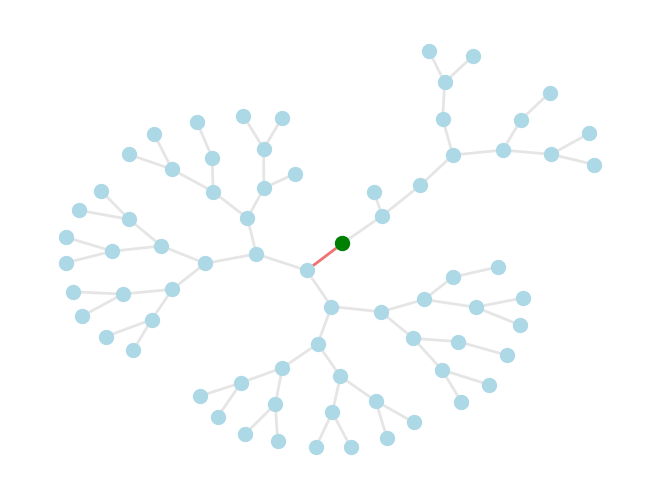

In [20]:
env = CnTreeEnv(
    max_layers=7,
    branching_prob=0.9,
    horizon=1,
    node_encoding_corr=0.,
    state_dim=10
)

G = env.to_networkx()
pos = nx.kamada_kawai_layout(G)

red_edges = [((0, 0), (1, 0))]  # Example edges - replace with your desired edges
edge_colors = ['red' if edge in red_edges else 'gray' for edge in G.edges()]

# Specify which nodes you want to color green
green_nodes = [(0, 0)]  # Example nodes - replace with your desired nodes
node_colors = ['green' if node in green_nodes else 'lightblue' for node in G.nodes()]

plt.figure()  # Create a new figure

# First draw all edges and nodes in default style
nx.draw(G, pos,
       node_color='lightblue',
       edge_color='white',
       node_size=100,
       font_size=8,
       font_weight='bold',
       width=1,
       alpha=0.7)

# Then draw specific edges in red
nx.draw_networkx_edges(G, pos,
       edgelist=G.edges(),
       edge_color='gray',
       alpha=0.2,
       width=2)


# Then draw specific edges in red
nx.draw_networkx_edges(G, pos,
                      edgelist=red_edges,
                      edge_color='red',
                      alpha=0.5,
                      width=2)

# Then draw specific nodes in green
nx.draw_networkx_nodes(G, pos,
                      nodelist=green_nodes,
                      node_color='green',
                      node_size=100)

plt.show()